# 1D-CFAR

In [87]:
import numpy as np

def CFARDetector1D(data, pfa, train_size, guard_size):
    """Apply the 1D-CFAR algorithm to detect peaks in the given data.

    Args:
        data (ndarray): The 1D input data to search for peaks.
        threshold_factor (float): The factor used to multiply the noise level
            estimate to obtain the detection threshold.
        window_size (tuple): The size of the sliding window used in the CFAR
            algorithm.

    Returns:
        
    """
    win = train_size + guard_size

    N = train_size * 2
    threshold_factor = N * (np.power(pfa, -1/N) - 1)
    print(f"{threshold_factor=}")

    # Output data
    out = np.zeros_like(data)

    # Slide the window across the data and compare the central cell to the
    # mean of the surrounding training cells
    for i in range(win, len(data) - win):
        # Compute the indices of the training cells
        training_indices = np.concatenate(
            (np.arange(i - win, i - guard_size),
                np.arange(i + guard_size + 1, i + win + 1)))

        # Extract the training cells
        training_cells = data[training_indices]

        # Compute the noise power estimate
        Pn = np.mean(training_cells)

        # Compute the detection threshold
        threshold = threshold_factor * Pn

        # If the central cell is greater than the threshold, add it to the
        # list of peaks
        if data[i] > threshold:
            out[i] = 1

    return out


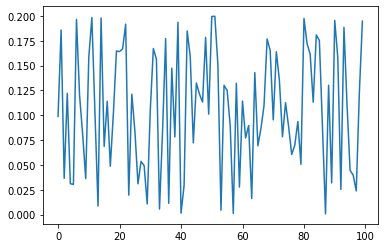

In [88]:
import matplotlib.pyplot as plt

data = np.random.rand(100) / 5
plt.plot(data)



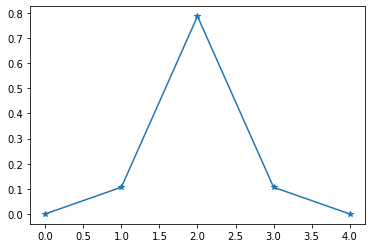

In [89]:
def gaussian_kernel(size, sigma):
    # create a one-dimensional array of size 'size'
    x = np.arange(-(size//2), size//2 + 1, 1)
    
    # calculate the Gaussian distribution
    kernel = np.exp(-np.power(x, 2) / (2 * np.power(sigma, 2)))
    
    # normalize the kernel
    kernel = kernel / np.sum(kernel)
    
    return kernel

kernel = gaussian_kernel(5, 0.5)
plt.plot(kernel, marker='*')

In [90]:
kernel.shape

(5,)

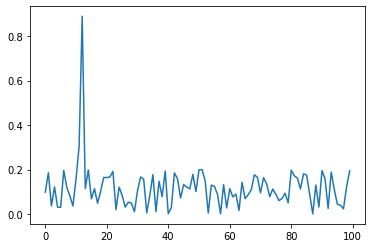

In [91]:
data[10:15] += kernel
plt.plot(data)

threshold_factor=5.178508235883346


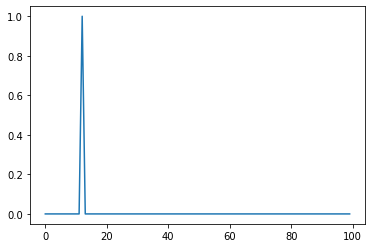

In [92]:
out = CFARDetector1D(data, 0.01, 10, 1)
plt.plot(out)

# 2D CFAR

In [93]:
import numpy as np

def CFARDetector2D(data, pfa, training_band_size, guard_band_size):
    """Apply the 2D-CFAR algorithm to detect peaks in the given data.

    Args:
        data (ndarray): The 2D input data to search for peaks.
        threshold_factor (float): The factor used to multiply the noise level
            estimate to obtain the detection threshold. Default is 1.5.
        window_size (tuple): The size of the sliding window used in the CFAR
            algorithm. Default is (8, 8).

    Returns:
        An array of tuples representing the coordinates of the detected peaks.
    """
    # Define the dimensions of the data
    num_rows, num_cols = data.shape

    th, tw = training_band_size
    gh, gw = guard_band_size
    N = (th + gh) * (tw + gw) - gh * gw
    win_h, win_w = (th + gh, tw + gw)
    threshold_factor = N * (np.power(pfa, -1/N) - 1)
    print(f"{threshold_factor=}")

    # Initialize the list of peak coordinates
    peaks = []

    # Output map
    outmap = np.zeros_like(data)

    # Slide the window across the data and compare the central cell to the
    # mean of the surrounding training cells
    for i in range(win_h, num_rows - win_h):
        for j in range(win_w, num_cols - win_w):
            # Compute the indices of the training cells
            training_rows = np.concatenate(
                (np.arange(i - win_h, i - gh),
                 np.arange(i + gh + 1, i + win_h + 1)))
            training_cols = np.concatenate(
                (np.arange(i - win_w, i - gw),
                 np.arange(i + gw + 1, i + win_w + 1)))

            # Extract the training cells
            training_cells = data[np.ix_(training_rows, training_cols)]

            # Compute the noise power estimate
            Pn = np.mean(training_cells)

            # Compute the detection threshold
            threshold = threshold_factor * Pn

            # If the central cell is greater than the threshold, add it to the
            # list of peaks
            if data[i, j] > threshold:
                peaks.append((i, j))
                outmap[i, j] = 1

    return peaks, outmap


In [94]:
def create_gaussian_kernel(kernel_size, sigma):
    # create a meshgrid of coordinates
    x, y = np.meshgrid(np.arange(-kernel_size // 2 + 1, kernel_size // 2 + 1),
                       np.arange(-kernel_size // 2 + 1, kernel_size // 2 + 1))
    
    # calculate the Gaussian function
    gaussian_kernel = np.exp(-(x ** 2 + y ** 2) / (2 * sigma ** 2))
    
    return gaussian_kernel

threshold_factor=2.311021347513659


(<AxesSubplot:>, <matplotlib.image.AxesImage at 0x1e4c63a7d60>)

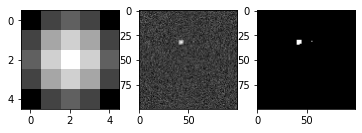

In [95]:
import numpy as np
import matplotlib.pyplot as plt

# Generate some test data
data = np.random.normal(loc=3, size=(100,100))

s = 5
kernel = create_gaussian_kernel(s, 2)
plt.subplot(131), plt.imshow(kernel, cmap='gray')

data[30:30+s,40:40+s] += kernel * 10

plt.subplot(132), plt.imshow(data, cmap='gray')

# Detect the peaks using the 2D-CFAR algorithm
peaks, outmap = CFARDetector2D(data, 0.1, (15, 15), (3,3))
plt.subplot(133), plt.imshow(outmap, cmap='gray')

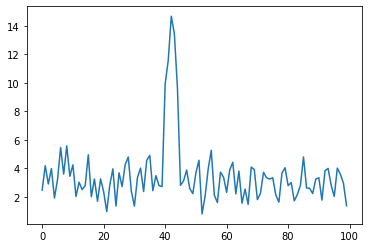

In [96]:
plt.plot(data[32])